In [1]:
import random
import time
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np

from cube import Cube
from tile import Tile
from ck2map import CK2Map
from continent_gen import *
from border_doodler import BorderDoodler


In [2]:
random.seed(1066)

In [3]:
start_time = time.time()
continent, kingdoms = new_continent_gen(5)
end_time = time.time()
print(end_time-start_time)

border duchies 3
border duchies 3
border duchies 3
border duchies 3
border duchies 3
Added 3 kingdoms!
Added 4 kingdoms!
Added 5 kingdoms!
{'border duchies 3': 5}
29.80296230316162


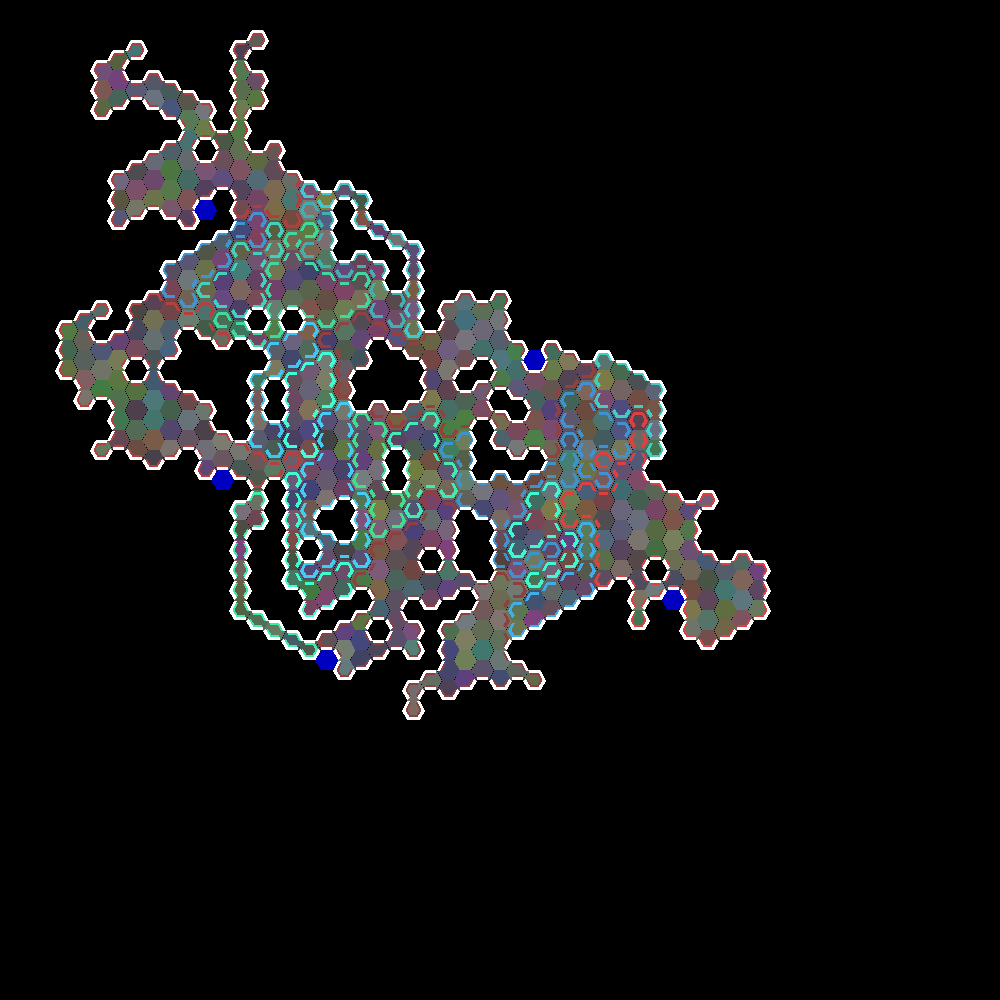

In [4]:
bdc = BorderDoodler(continent, size=(1000,1000),radius=10, depth=1)
bdc.im

In [5]:
[len(t.relative_hex_list()) for t in continent.tile_list]

[22,
 61,
 61,
 61,
 12,
 12,
 12,
 12,
 12,
 12,
 22,
 61,
 12,
 12,
 12,
 12,
 22,
 61,
 12,
 12,
 12,
 12]

In [13]:
import os
def make_dot_mod(file_dir, mod_name, mod_disp_name):
    '''Build the basic mod details file.'''
    outer = "name = \"{}\"\npath = \"mod/{}\"\n".format(mod_disp_name, mod_name)
    inner = "name = \"{}\"\n".format(mod_disp_name)
    shared = "user_dir = \"{}\"\n".format(mod_name)
    shared += "tags = {\n\t\"Total Conversion\"\n}\n"
    replace_paths = ["common/landed_titles", "map_data"] #"common/bookmarks", "common/cultures", "common/dynasties", 
                        #"common/offmap_powers", "history/characters", "history/offmap_powers", "history/provinces",
                        #"history/technology", "history/titles", "history/wars"]
    shared += "replace_path = \"" + "\"\nreplace_path = \"".join(replace_paths)+"\""
    os.makedirs(os.path.join(file_dir, mod_name), exist_ok=True)
    with open(os.path.join(file_dir,"{}.mod".format(mod_name)),'w') as f:
        f.write(outer + shared)
    with open(os.path.join(file_dir, mod_name, "descriptor.mod".format(mod_name)),'w') as f:
        f.write(inner + shared)

In [15]:
make_dot_mod('C:\\Users\\Vaniver\\Documents\\Paradox Interactive\\Crusader Kings III\\mod', 'map_test','Map Test')

user_dir = "map_test"
tags = {
	"Total Conversion"
}
replace_path = "common/landed_titles"
replace_path = "map_data"


In [17]:
import random

In [18]:
random.seed(42)

In [6]:
k = continent.tile_list[4]

In [7]:
len(k.relative_hex_list())

12

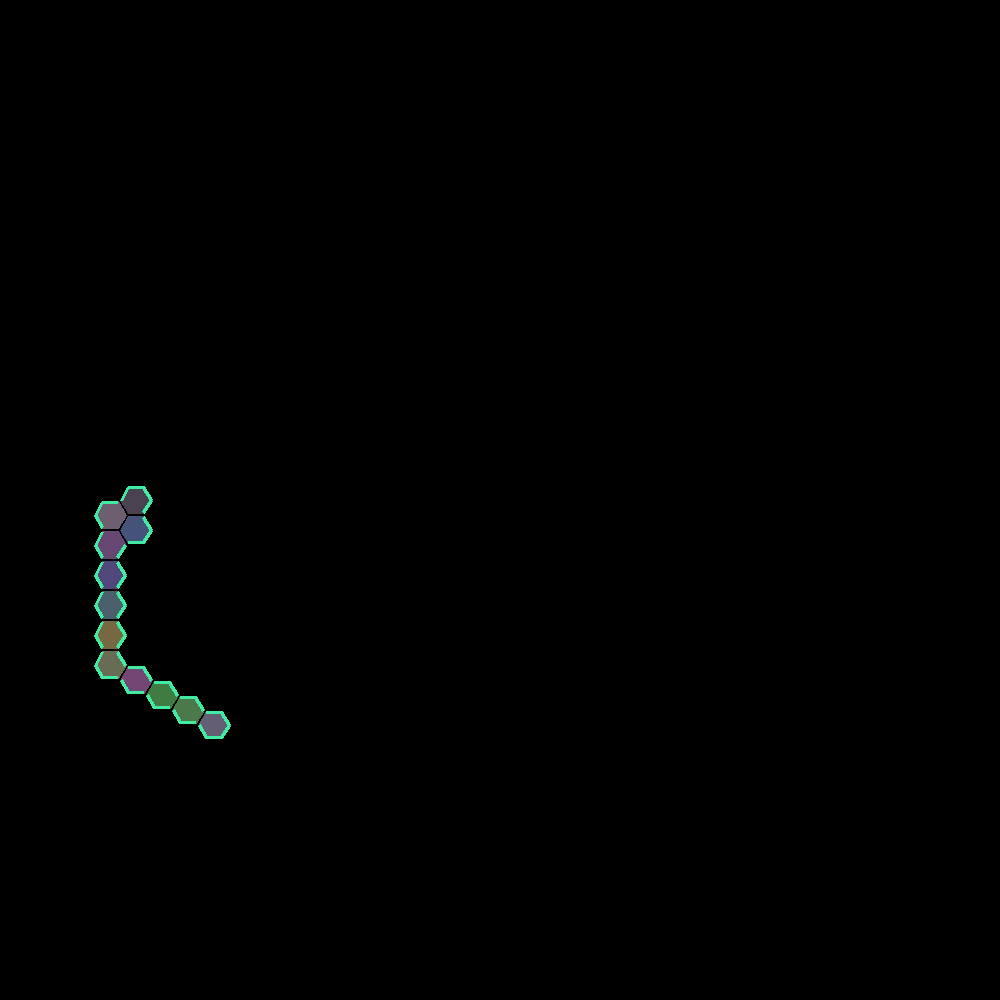

In [168]:
bdk = BorderDoodler(continent.tile_list[15],
                    size=(1000,1000),radius=15)
bdk.im

In [154]:
def check_contig(split, nbr_dict):
    """Checks that each of the lists of hexs in split is contiguous."""
    for group in split:
        never_visited = set(group)
        to_visit = set()
        if len(never_visited) == 0:
            continue
        to_visit.add(never_visited.pop())
        while len(to_visit) > 0:
            this_one = to_visit.pop()
            for el in nbr_dict[this_one]:
                if el in never_visited:
                    never_visited.remove(el)
                    to_visit.add(el)
        if len(never_visited) > 0:
            return False
    return True

In [144]:
def divide_into_counties(tile, size_list):
    hex_list = [el for el in tile.hex_list]
    assert len(hex_list) == sum(size_list)
    counties = [[] for _ in size_list]
    num_left = [el for el in size_list]
    nbr_dict = {}
    for el in hex_list:
        nbr_dict[el] = [nel for nel in el.neighbors() if nel in hex_list]
    nn1 = [el for el in hex_list if len(nbr_dict[el]) == 1]
    idx = 0
    while len(nn1) > 0 and idx < len(size_list):
        single = nn1.pop()
        hex_list.remove(single)
        counties[idx].append(single)
        num_left[idx] -= 2
        nbr = [el for el in nbr_dict[single] if el in hex_list][0]
        counties[idx].append(nbr)
        hex_list.remove(nbr)
        while len(nbr_dict[nbr]) == 2 and num_left[idx] > 0:
            nbr = [el for el in nbr_dict[nbr] if el not in counties[idx]][0]
            counties[idx].append(nbr)
            hex_list.remove(nbr)
            num_left[idx] -= 1
        if len(nbr_dict[nbr]) == 2 and num_left[idx] == 0:
            nn1.append([el for el in nbr_dict[nbr] if el not in counties[idx]][0])
        idx += 1
    picks = [el for sublist in [[idx] * num for idx, num in enumerate(num_left)] for el in sublist]
    done = False
    while not done:
        this_split = []
        el_idx = 0
        for idx in range(len(size_list)):
            this_split.append(counties[idx])
            for _ in range(num_left[idx]):
                this_split[idx].append(hex_list[el_idx])
                el_idx += 1
        done = check_contig(this_split, nbr_dict)
    tile.hex_list = []
    tile.tile_list = [Tile(hex_list=hl, rgb=c_col()) for hl in this_split]

In [158]:
start_time = time.time()
for tl in continent.tile_list:
    if len(tl.relative_hex_list()) == 12:
        # divide_into_counties(tl, BORDER_SIZE_LIST)
        print(len(tl.tile_list))
print(time.time() - start_time)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0.003988742828369141


In [169]:
start_time = time.time()
tl = continent.tile_list[15]
divide_into_counties(tl, BORDER_SIZE_LIST)
print(time.time() - start_time)
tl.hex_list = tl.relative_hex_list()
tl.tile_list = []

0.0009965896606445312


In [147]:
tl.hex_list = tl.relative_hex_list()
tl.tile_list = []

In [148]:
tile = tl
size_list = BORDER_SIZE_LIST
hex_list = [el for el in tile.hex_list]
assert len(hex_list) == sum(size_list)
counties = [[] for _ in size_list]
num_left = [el for el in size_list]
nbr_dict = {}
for el in hex_list:
    nbr_dict[el] = [nel for nel in el.neighbors() if nel in hex_list]
nn1 = [el for el in hex_list if len(nbr_dict[el]) == 1]
idx = 0
while len(nn1) > 0 and idx < len(size_list):
    single = nn1.pop()
    hex_list.remove(single)
    counties[idx].append(single)
    num_left[idx] -= 2
    nbr = [el for el in nbr_dict[single] if el in hex_list][0]
    counties[idx].append(nbr)
    hex_list.remove(nbr)
    while len(nbr_dict[nbr]) == 2 and num_left[idx] > 0:
        nbr = [el for el in nbr_dict[nbr] if el not in counties[idx]][0]
        counties[idx].append(nbr)
        hex_list.remove(nbr)
        num_left[idx] -= 1
    if len(nbr_dict[nbr]) == 2 and num_left[idx] == 0:
        nn1.append([el for el in nbr_dict[nbr] if el not in counties[idx]][0])
    idx += 1
picks = [el for sublist in [[idx] * num for idx, num in enumerate(num_left)] for el in sublist]
done = False
while not done:
    this_split = []
    el_idx = 0
    for idx in range(len(size_list)):
        this_split.append(counties[idx])
        for _ in range(num_left[idx]):
            this_split[idx].append(hex_list[el_idx])
            el_idx += 1
    done = check_contig(this_split, nbr_dict)

In [150]:
this_split

[[Cube(6, -2, -4), Cube(5, -1, -4), Cube(5, 0, -5), Cube(5, 1, -6)],
 [Cube(4, 3, -7), Cube(5, 2, -7), Cube(4, 2, -6), Cube(6, 0, -6)],
 [Cube(7, -1, -6), Cube(6, 1, -7), Cube(5, 3, -8), Cube(7, 0, -7)]]

In [155]:
check_contig(this_split, nbr_dict)

False

In [153]:
group = this_split[0]
never_visited = set(group)
to_visit = set()
to_visit.add(never_visited.pop())


In [119]:
this_split = []
el_idx = 0
for idx in range(len(size_list)):
    this_split.append(counties[idx])
    for _ in range(num_left[idx]):
        this_split[idx].append(hex_list[el_idx])
        el_idx += 1


In [120]:
this_split

[[Cube(-12, 7, 5), Cube(-12, 6, 6), Cube(-12, 5, 7), Cube(-12, 4, 8)],
 [Cube(-12, 3, 9), Cube(-12, 2, 10), Cube(-11, 1, 10), Cube(-10, 1, 9)],
 [Cube(-11, 0, 11), Cube(-9, 0, 9), Cube(-9, 1, 8), Cube(-10, 0, 10)]]

In [121]:
check_contig(this_split, nbr_dict)

True

In [79]:
[el for sublist in [[idx] * num for idx, num in enumerate(num_left)] for el in sublist]

[1, 2, 2, 2, 2]